<pre><div style="text-align:center">Shon Otmazgin    Sapir Rubin</div><div style="text-align:center">305394975        301659751</div></pre>

### Abstract
Credit card Supervised learning has been widely used to detect anomaly in credit card transaction records based on the assumption that the pattern of a fraud would depend on the past transaction. However, unsupervised learning does not ignore the fact that the fraudsters could change their approaches based on customers’ behaviors and patterns. In this study, three unsupervised methods will be present an approch for anomaly detection using GMM and compare it with OneClassSVM, and DB-scan. 
Our model utilizes mixutre of Gaussians to generate the likelihood function, evaluates samples with thier likelihood score and samples score under threshold T consider to be anomalies. the described method is iterative until model converges.
The dataset used in this study is based on real-life data of credit card transaction. Due to the availability of the response(labels), after training the models we can evaluate the performance of each model. The performance of these three methods is discussed extensively in this paper.

### Dataset 
The dataset that is used for credit card fraud detection is derived from the following [URL](https://eur02.safelinks.protection.outlook.com/?url=https%3A%2F%2Fdata.world%2Fraghu543%2Fcredit-card-fraud-data&amp;data=02%7C01%7CYael.Madar%40biu.ac.il%7Cb48189911f224aef8c2e08d79ff0c5e6%7C61234e145b874b67ac198feaa8ba8f12%7C0%7C0%7C637153728776732928&amp;sdata=tzNpfPA2qlY12Dp1Zli5FW5ugw0Q05OaTCay5mAvo4c%3D&amp;reserved=0)

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly imbalanced, the positive class (frauds) account for 0.172% of all transactions.

Due to confidentiality issues, there are not provided the original features and more background information about the data.
It contains only numerical input variables which are the result of a PCA transformation.

- Features V1, V2, ... V28 are the principal components obtained with PCA;
- The only features which have not been transformed with PCA are Time and Amount.
 - Feature Time contains the seconds elapsed between each transaction and the first transaction in the dataset.
 - The feature Amount is the transaction Amount.
- Feature Class is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### Problem Statement Task:

The Credit Card Fraud Detection Problem includes past credit card transactions. The need is to identify whether a new transaction is fraudulent or not. The data is higly imbalanced and our aim here is to detect the fraudulent transactions while minimizing the incorrect fraud classifications.
Let's realize that we are looking for a needle in a hay barn. 99% of the data are valid transactions. We could balance the data by oversampling or undersampling, but we want our models to be able to produce results in the real word not just in testing environment. This is why we should use the imbalanced data, in order to better simulate real world cases. If our model can identify even a fraction of fraud cases with high precision, it is adding value.

#### Load packages

In [293]:
from warnings import filterwarnings
filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, classification_report
from sklearn.metrics import recall_score, precision_score, f1_score, precision_recall_curve, auc

RANDOM_STATE = 42

### Data Exploration and visualization

In [2]:
df = pd.read_csv("../dataset/creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Looking to the Time feature, we can confirm that the data contains 284,807 transactions, during 2 consecutive days (or 172792 seconds).

#### Check missing data

In [6]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Class,V14,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Time
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There is no missing data in the entire dataset.

#### Class Distribution

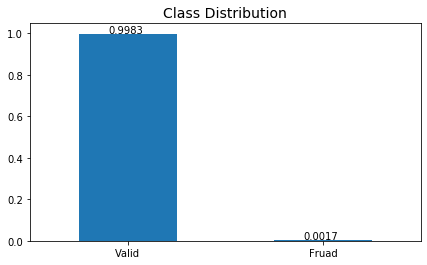

In [7]:
ax = df['Class'].value_counts(normalize=True).plot(kind='bar',  figsize=(7,4))
for i, v in enumerate(df['Class'].value_counts(normalize=True).values):
    ax.text(i - 0.1, v + 0.005, str(round(v, 4)))
ax.set_xticklabels(['Valid', 'Fruad'],rotation=0)
ax.set_title('Class Distribution', fontsize=14)

plt.show()

Only 492 (or 0.172%) of transaction are fraudulent. That means the data is highly imbalanced with respect with target variable Class.  

#### Transactions Time and Amount Distributions

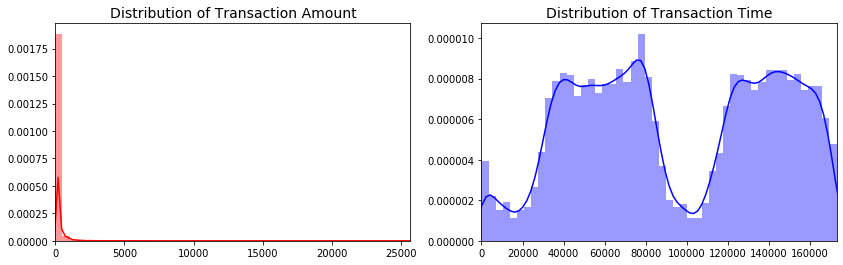

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(14,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

- Most transactions are small amounts transactions, less than $100.
- Clearly, it looks like there are cycles in Time.

#### Transactions Time and Amount Distributions by Class

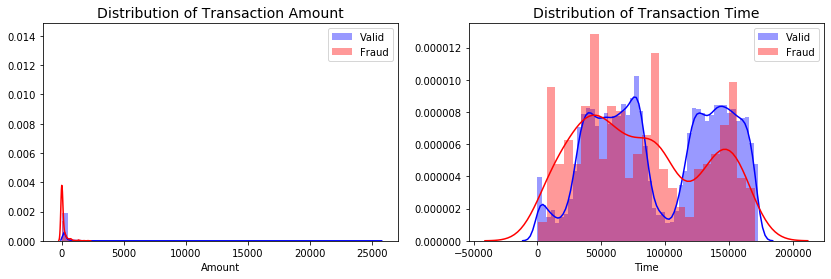

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(14,4))

time_class_0 = df.loc[df['Class'] == 0]["Time"]
time_class_1 = df.loc[df['Class'] == 1]["Time"]
amount_class_0 = df.loc[df['Class'] == 0]["Amount"]
amount_class_1 = df.loc[df['Class'] == 1]["Amount"]

sns.distplot(amount_class_0, ax=ax[0], color='b' ,hist=True, label='Valid')
sns.distplot(amount_class_1, ax=ax[0], color='r' ,hist=True, label='Fraud')

sns.distplot(time_class_0, ax=ax[1], color='b' ,hist=True, label='Valid')
sns.distplot(time_class_1, ax=ax[1], color='r' ,hist=True, label='Fraud', bins=25)

ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[0].legend()
ax[1].legend()
plt.show()

- The 'Time' feature looks pretty similar across both types of transactions. You could argue that fraudulent transactions are more uniformly distributed, while valid transactions have a cyclical distribution. This could make it easier to detect a fraudulent transaction during at an 'off-peak' time.
- Most transactions are small amounts, less than $100. Fraudulent transactions have a maximum value far less than normal transactions, 2K vs 25k.

Now let's see if the transaction amount differs between the two types.

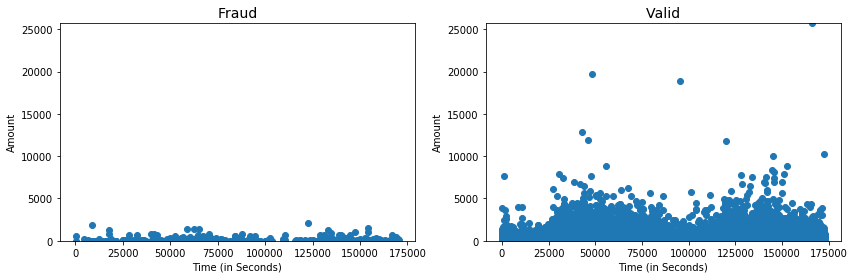

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))

ax1.scatter(df.Time[df.Class == 1], df.Amount[df.Class == 1])
ax1.set_title('Fraud', fontsize=14)
ax1.set_ylim([min(amount_val), max(amount_val)])
ax1.set_ylabel('Amount')
ax1.set_xlabel('Time (in Seconds)')

ax2.scatter(df.Time[df.Class == 0], df.Amount[df.Class == 0])
ax2.set_title('Valid', fontsize=14)
ax2.set_ylim([min(amount_val), max(amount_val)])
ax2.set_ylabel('Amount')
ax2.set_xlabel('Time (in Seconds)')

plt.show()

Both types equally distributed over time. y-axis is signiffly different between fraud and valid transactions.  

**Reminder** - Unsupervised Learning is a process of training a machine learning model on a dataset in which target variable is unknown. Hence feature selection correlated with label class is unacceptable.

### Scaling
In this phase of our paper, we will scale the columns comprise of Time and Amount . Time and Amount should be scaled as the other columns already scaled through the PCA transformation.
We will use Robust Scaler, Scale features using statistics that are robust to outliers.

In [147]:
scaled_df = df.drop(columns=['Class'])
scaled_df['Amount'] = RobustScaler().fit_transform(df['Amount'].values.reshape(-1,1))
scaled_df['Time'] = RobustScaler().fit_transform(df['Time'].values.reshape(-1,1))
scaled_df['Class'] = df['Class']

#### Split the Data to 80% Train and 20% Test

In [148]:
train_df, test_df = train_test_split(scaled_df, test_size=0.2, random_state=RANDOM_STATE)

In [149]:
### This is just to save time during training.
train_df = train_df.sample(frac=0.2 , random_state=RANDOM_STATE)
test_df = test_df.sample(frac=0.2 , random_state=RANDOM_STATE)

X = train_df.drop(columns=['Class'], axis=1).reset_index(drop=True)
y = train_df['Class'].reset_index(drop=True)
X_test = test_df.drop(columns=['Class'], axis=1).reset_index(drop=True)
y_test = test_df['Class'].reset_index(drop=True)

print(f'Train size: {X.shape}')
print(f'Test size: {X_test.shape}')

Train size: (45569, 30)
Test size: (11392, 30)


### GMM modeling

A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters.
We are assuming that these data are Gaussian and we want to find parameters that maximize the likelihood of observing these data. In other words, we regard each point as being generated by a mixture of Gaussians and can compute that probability.

Assumning number of $K$ Gaussian distributions and $n$ data observations.  
Our unknown parameters are:
$\theta = \{\mu_1,\ldots,\mu_K,\sigma_1,\ldots,\sigma_K,\pi_1,\ldots,\pi_K\} \tag{1}$
Likelihood:
$L(\theta | X_1,\ldots,X_n) = \prod_{i=1}^n \sum_{k=1}^K \pi_k N(x_i;\mu_k, \sigma_k^2) \tag{2}$
So our log-likelihood is:
$\ell(\theta) = \sum_{i=1}^n \log \left( \sum_{k=1}^K \pi_k N(x_i;\mu_k, \sigma_k^2) \right ) \tag{3}$
The log-likelihood is without closed-form solutions, hence solving with EM algorithm.  
Define latent variables $Z_i$:  
$Z_i \in \{1,\ldots,K\}$ is the latent variable representing the mixture component for $X_i$  
Intuitively, the latent variables $Z_i$ should help us find the MLEs. We first attempt to compute the posterior distribution of $Z_i$ given the observations:  

$P(Z_i=k|X_i) = \frac{P(X_i|Z_i=k)P(Z_i=k)}{P(X_i)} = \frac{\pi_k N(\mu_k,\sigma_k^2)}{\sum_{k=1}^K\pi_k N(\mu_k, \sigma_k)} = \gamma_{Z_i}(k) \tag{4}$

the derivative of the log-likelihood with respect to each unknown parameters:

$\hat{\mu_k} = \frac{\sum_{i=1}^n \gamma_{z_i}(k)x_i}{\sum_{i=1}^n \gamma_{z_i}(k)} = \frac{1}{N_k} \sum_{i=1}^n \gamma_{z_i}(k)x_i \tag{5}$  
$\begin{align}
\hat{\sigma_k^2} &= \frac{1}{N_k}\sum_{i=1}^n \gamma_{z_i}(k) (x_i - \mu_k)^2 \tag{6} \\
\hat{\pi_k} &= \frac{N_k}{n} \tag{7}
\end{align}$

### Selecting  GMM number of components

#### Bayesian information criterion (BIC)
This criterion gives us an estimation how good is the GMM in terms of predicting the data we actually have.  
The lower is the BIC, the better is the model to actually predict the data we have, and by extension, the true, unknown, distribution. 
When fitting models, it is possible to increase the likelihood by adding parameters, but doing so may result in overfitting.  
BIC attempt to resolve this problem by introducing a penalty term for the number of parameters in the model
In order to avoid overfitting, this technique penalizes models with big number of clusters.  

$BIC= ln(n)K - 2ln(\hat L) \tag{1}$

#### Silhouette score
This score consider two measures:
- $a(i)$ - The mean distance between a sample and all other points in the same cluster.
- $b(i)$ - The mean distance between a sample and all other points in the next nearest cluster.  

i.e. it checks how much the clusters are compact and well separated. The more the score is near to one, the better the clustering is.  



$\large s(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}} \tag{2}$


Since we already know that the fitting procedure is not deterministic, we ran twenty fits for each number of clusters 2 to 10, then we consider the mean value and the standard deviation of the runs.  
The results are:

In [294]:
n_clusters=np.arange(2, 11)
iterations=20
n_init = 2

In [295]:
%%time
gmm_clfs = {} # dict for clf with n componnents and clf iterations
for n in n_clusters:
    print(f'fitting {n} clusters')
    clfs = []
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=n_init, covariance_type='full').fit(X) 
        clfs.append(gmm)
    gmm_clfs[n] = clfs

fitting 2 clusters
fitting 3 clusters
fitting 4 clusters
fitting 5 clusters
fitting 6 clusters
fitting 7 clusters
fitting 8 clusters
fitting 9 clusters
fitting 10 clusters
Wall time: 1h 35min


In [296]:
%%time
bics=[]
bics_err=[]
sils=[]
sils_err=[]
for n in n_clusters:
    tmp_bic=[]
    tmp_sil=[]
    for i in range(iterations):
        gmm=gmm_clfs[n][i] 
        labels=gmm.predict(X)
        
        sil=silhouette_score(X, labels, metric='euclidean')
        bic=gmm.bic(X)
        
        tmp_bic.append(bic)
        tmp_sil.append(sil)
    bics.append(np.mean(tmp_bic))
    bics_err.append(np.std(tmp_bic))
    sils.append(np.mean(tmp_sil))
    sils_err.append(np.std(tmp_sil))

Wall time: 1h 24min 17s


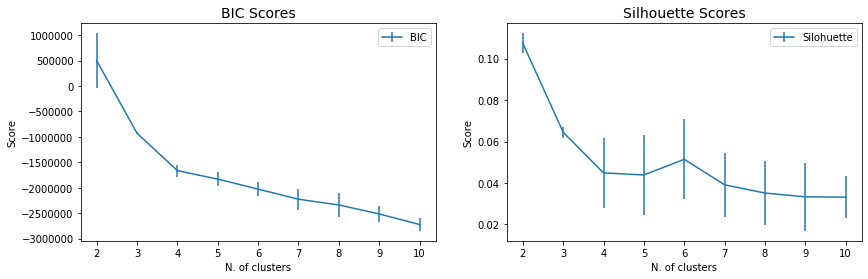

In [308]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))

ax1.errorbar(n_clusters,bics, yerr=bics_err, label='BIC')
ax1.set_title("BIC Scores", fontsize=14)
ax1.set_ylabel("Score")
ax1.set_xlabel("N. of clusters")
ax1.legend()

ax2.errorbar(n_clusters, sils, yerr=sils_err, label='Silohuette')
ax2.set_title("Silhouette Scores", fontsize=14)
ax2.set_ylabel("Score")
ax2.set_xlabel("N. of clusters")
ax2.legend()

plt.show()

#### Silhouette score
WE can see the the bigger the number of clusters the higher standard deviation.
It turns out that we get the best score with 2 clusters. Also 3 clusters can be a candidate. if we consider the standard deviation (the ‘error’) of both configurations and the scores, 2 clusters is the selected.

#### BIC score
We can notice two things. The first is that the curve is fairly smooth and monotone. The second is that the curve follows different slopes in different part of it.
Following this criterion, the bigger the number of clusters, the better should be the model. Which means that the penalty BIC gives to complex models, do not save us from overfit.

Selected 2 clusters as Silhouette score recommended. 

### Our Anomaly detection using GMM algorithm:
$X$ - Dataset  
$K$ - number of clusters  
$\Sigma$ type - full  
$I$ - number of iterations

1. $C1$ = GaussianMixture($K$).fit($X$)  
2. for $i$ in $range(I)$:
 1. Initialize $F = \emptyset$   
 2. $\theta = C1.means, C1.covariance, C1.weights$   
 3. Compute $\ell(s|\theta), s \in X$  
 4. If $\ell(s|\theta)<T$ then $s$ is fraud transaction; add $s$ to $F$  
 5. $C2$ = GaussianMixture($K$).fit($X-F$)  
 6. If $C1$ == $C2$ call model converged and return $C2$  
   else $C1$=$C2$ and return to step 2 

#### Step 1

In [406]:
n_components=2

In [407]:
clf = GaussianMixture(n_components=n_components, covariance_type='full', random_state=RANDOM_STATE, n_init=n_init)
clf.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=2, precisions_init=None,
                random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

#### Terms:
- True Positives: Correctly Classified Fraud Transactions  
- False Positives: Incorrectly Classified Fraud Transactions
- True Negative: Correctly Classified Non-Fraud Transactions
- False Negative: Incorrectly Classified Non-Fraud Transactions

#### Introduce Precision, Recall and F1 scores:  
- Precision: $p=\frac{TP}{TP + FP}$
- Recall: $r=\frac{TP}{TP + FN}$
- Precision as the name says, says how precise (how sure) is our model in detecting fraud transactions while recall is the amount of fraud cases our model is able to detect.
- Precision/Recall Tradeoff: The more precise (selective) our model is, the less cases it will detect.
- $F_1$ score: $F_1=\frac{2pr}{p+r}$ The F1 score is the harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.

all possible thresholds:
$TS = [\ \ell(s|\theta)\ |\ s\ \in\ X] \tag{1}$
Selected threshold for log likelihood:  
$T = TS[\smash{\displaystyle\argmax_{i}} F_1] \tag{2}$

In other words the threshold selected is the where $F_1$ score reach the maximum.

Support Frauds: 64
Support Non-Frauds: 45505

Area under the curve: 0.121
Threshold for likelihood: -187.424
Max F1-Score: 0.236


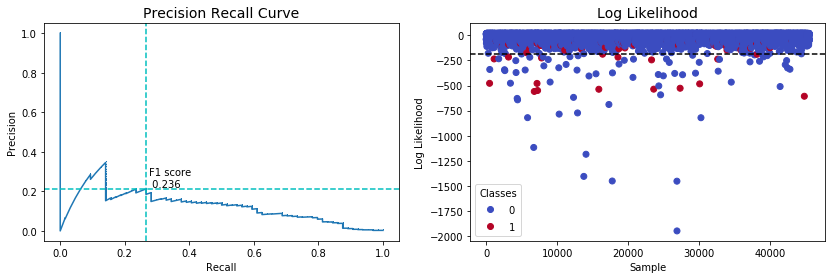

In [408]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))

gmm_log_likelihood = clf.score_samples(X)
gmm_precision, gmm_recall, thresholds = precision_recall_curve(y, -1 * gmm_log_likelihood)
gmm_auc = auc(gmm_recall, gmm_precision)

f1_scores = [ 2*recall*precision/(recall+precision) 
             if recall+precision > 0 
             else 0 
             for recall,precision in zip(gmm_recall, gmm_precision) ]

best_threshold = -thresholds[np.argmax(f1_scores)]
best_precision = gmm_precision[np.argmax(f1_scores)]
best_recall = gmm_recall[np.argmax(f1_scores)]
best_f1 = np.max(f1_scores)

print(f'Support Frauds: {len(y[y==1])}')
print(f'Support Non-Frauds: {len(y[y==0])}')
print()
print(f'Area under the curve: {gmm_auc:.3f}')
print(f'Threshold for likelihood: {best_threshold:.3f}')
print(f'Max F1-Score: {best_f1:.3f}')

ax1.plot(gmm_recall, gmm_precision, marker=',', label='GMM')
ax1.axvline(best_recall, linestyle='dashed', color='c')
ax1.axhline(best_precision, linestyle='dashed', color='c')
ax1.set_title('Precision Recall Curve', fontsize=14)
ax1.set_ylabel('Precision')
ax1.set_xlabel('Recall')
ax1.text(best_recall+0.01, best_precision+0.01, 'F1 score\n '+ str(round(best_f1, 3)))

ax2.scatter(range(0,len(gmm_log_likelihood)), gmm_log_likelihood, c=y, cmap='coolwarm')
ax2.legend(*scatter.legend_elements(), title="Classes")
ax2.axhline(best_threshold, linestyle='dashed', color='black')
ax2.set_title('Log Likelihood', fontsize=14)
ax2.set_ylabel('Log Likelihood')
ax2.set_xlabel('Sample')

plt.show()

It is very difficult to detect fraud transaction because in addition to severe class imbalance there is also severe class overlap. Fraud transactions are mixed with the valid ones in thier log likelihood score. It is important to tight our Gaussian model estimators to better fit with the data. we will do it via steps 2-7 in our algorithm and evaluate how better our Gussian for detecting anomalies.  
following results:

#### step 2-7:

In [411]:
%%time
iterations = 20
recall = [best_recall]
precision = [best_precision]
for i in range(iterations):
    gmm_log_likelihood = clf.score_samples(X)
    tmp_s = pd.Series(gmm_log_likelihood)
    anomaly_indices=tmp_s[tmp_s<best_threshold].index
    
    y_pred = clf.score_samples(X)
    y_pred[y_pred>=best_threshold] = 0
    y_pred[y_pred<best_threshold] = 1
    recall.append(recall_score(y, y_pred))
    precision.append(precision_score(y, y_pred))
    
    tmp_X = X.loc[~X.index.isin(anomaly_indices)]
    tmp_clf = GaussianMixture(n_components=n_components, covariance_type='full', random_state=RANDOM_STATE, n_init=2)
    tmp_clf.fit(tmp_X)
    if np.array_equal(clf.means_, tmp_clf.means_) and \
       np.array_equal(clf.covariances_, tmp_clf.covariances_) and \
       np.array_equal(clf.weights_, tmp_clf.weights_):
            print('converged! check out clf')  
            break
    else:
        clf = tmp_clf

Wall time: 2min 3s


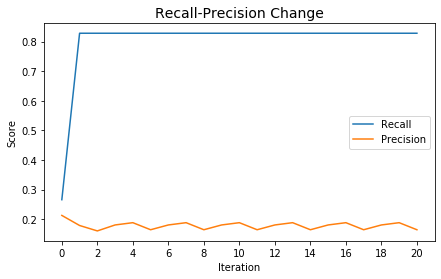

In [417]:
fig, ax1 = plt.subplots(1, 1, figsize=(7,4))

ax1.plot(recall, label='Recall')
ax1.plot(precision, label='Precision')
ax1.set_title('Recall-Precision Change', fontsize=14)
ax1.set_ylabel('Score')
ax1.set_xlabel('Iteration')
ax1.set_xticks(range(0,len(recall), 2))
ax1.legend()

plt.show()

We can observe that recall is incresing until converged to constant ~0.8 while precision switching between small slice with lower and upper bounds. This is importent beacuse overall we do not harm our model preformance in each iteration.  
Now we have our final model and we can select new threshold $T$ with respect to precision-recall trade-off.

#### Evaluate our final model 

Support Frauds: 64
Support Non-Frauds: 45505

Area under the curve: 0.721
Best threshold for likelihood: -1144984.691
Best F1-Score: 0.843


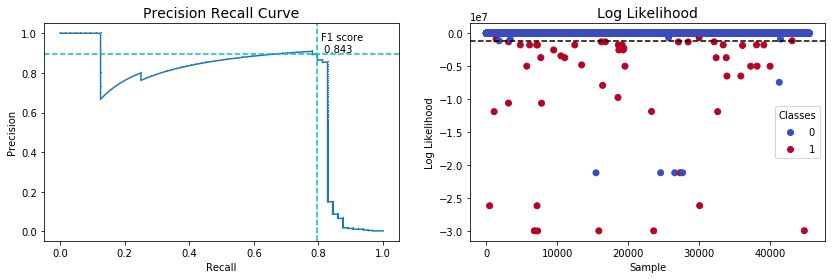

In [418]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))

gmm_log_likelihood = clf.score_samples(X)
gmm_precision, gmm_recall, thresholds = precision_recall_curve(y, -1 * gmm_log_likelihood)
gmm_auc = auc(gmm_recall, gmm_precision)

f1_scores = [ 2*recall*precision/(recall+precision) 
             if recall+precision > 0 
             else 0 
             for recall,precision in zip(gmm_recall, gmm_precision) ]

best_threshold = -thresholds[np.argmax(f1_scores)]
best_precision = gmm_precision[np.argmax(f1_scores)]
best_recall = gmm_recall[np.argmax(f1_scores)]
best_f1 = np.max(f1_scores)

print(f'Support Frauds: {len(y[y==1])}')
print(f'Support Non-Frauds: {len(y[y==0])}')
print()
print(f'Area under the curve: {gmm_auc:.3f}')
print(f'Best threshold for likelihood: {best_threshold:.3f}')
print(f'Best F1-Score: {best_f1:.3f}')

ax1.plot(gmm_recall, gmm_precision, marker=',', label='GMM')
ax1.axvline(best_recall, linestyle='dashed', color='c')
ax1.axhline(best_precision, linestyle='dashed', color='c')
ax1.set_title('Precision Recall Curve', fontsize=14)
ax1.set_ylabel('Precision')
ax1.set_xlabel('Recall')
ax1.text(best_recall+0.01, best_precision+0.01, 'F1 score\n '+ str(round(best_f1, 3)))

ax2.scatter(range(0,len(gmm_log_likelihood)), gmm_log_likelihood, c=y, cmap='coolwarm')
ax2.legend(*scatter.legend_elements(), title="Classes")
ax2.axhline(best_threshold, linestyle='dashed', color='black')
ax2.set_title('Log Likelihood', fontsize=14)
ax2.set_ylabel('Log Likelihood')
ax2.set_xlabel('Sample')

plt.show()

Now it much more easy to detect frauds transactions based on log likelihood function. lower log likelihood function are indeed anomaly transactions. We can conclude that our Gaussian estimators are more fitted to vaild transactions while we didn't fit the model only with valid transactions! 

#### Evaluate test set

Testing our model with test set we achive the following result: 

In [421]:
y_pred = clf.score_samples(X_test)
y_pred[y_pred>=best_threshold] = 0
y_pred[y_pred<best_threshold] = 1

print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11374
           1       0.82      0.78      0.80        18

    accuracy                           1.00     11392
   macro avg       0.91      0.89      0.90     11392
weighted avg       1.00      1.00      1.00     11392



In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=1)
y_pred = kmeans.fit_predict(X_reduced_pca_2)

In [843]:
y_pred = kmeans.fit_predict(X_reduced_pca_2)
for i,sample in X_reduced_pca_2.iterrows():
    norm = np.linalg.norm(sample.values - kmeans.cluster_centers_)
    if norm>=0.24:
        y_pred[i] = 1

No handles with labels found to put in legend.


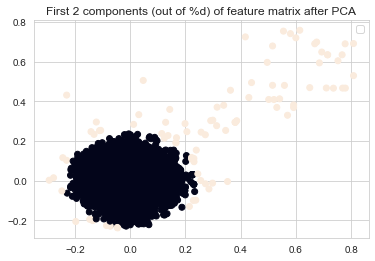

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28866
           1       0.53      0.80      0.64        61

    accuracy                           1.00     28927
   macro avg       0.76      0.90      0.82     28927
weighted avg       1.00      1.00      1.00     28927



In [844]:
fig, ax1 = plt.subplots(ncols=1)

# PCA
ax1.scatter(X_reduced_pca_2[0], X_reduced_pca_2[1],c=y_pred)
ax1.set_title('First 2 components (out of %d) of feature matrix after PCA')

# plt.savefig(name + '.tif')
plt.legend()
plt.show()
print(classification_report(y,y_pred))

In [426]:
%%time
count = 0
tp = 0
scores_2 = []
for i,s in enumerate(X.values):
    scores_2.append([i, kmeans.predict(s.reshape(1, -1))[0], kmeans.score(s.reshape(1, -1)), y[i]])

Wall time: 2min 39s


In [285]:
from sklearn.cluster import KMeans

# function returns WSS score for k values from 1 to kmax
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse

In [286]:
wss = calculate_WSS(X_reduced_pca_2, 20)

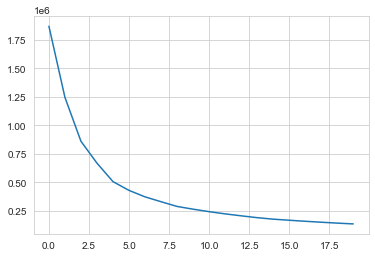

In [288]:
plt.plot(wss)

In [68]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
confusion_matrix = confusion_matrix(y, y_pred)
print('precision', precision)
print('recall', recall)
print(confusion_matrix)

precision 0.9941520467836257
recall 0.34552845528455284
[[2999    1]
 [ 322  170]]


In [69]:
from sklearn.metrics import roc_auc_score

print('Kmeans: ', roc_auc_score(y, y_pred))

Kmeans:  0.6725975609756097


### Methods
Clustering-Based Anomaly Detection
Clustering is one of the most popular concepts in the domain of unsupervised learning.

Assumption: Data points that are similar tend to belong to similar groups or clusters, as determined by their distance from local centroids.

K-means is a widely used clustering algorithm. It creates 'k' similar clusters of data points. Data instances that fall outside of these groups could potentially be marked as anomalies.

In [1680]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import time

tic=time.time()
full_data=pd.read_csv("dataset/creditcard.csv")
full_data=full_data.sample(frac=1)#randomize the whole dataset
full_features=full_data.drop(["Time","Class"],axis=1)
full_labels=pd.DataFrame(full_data[["Class"]])
full_features_array=full_features.values
full_labels_array=full_labels.values
train_features,test_features,train_labels,test_labels=train_test_split(full_features_array,full_labels_array,train_size=0.90)
train_features=normalize(train_features)
test_features=normalize(test_features)
#k_means_classification --> k_means_clustering, confsion_matrix, reassigning
kmeans=KMeans(n_clusters=2,random_state=0,algorithm="elkan",max_iter=10000,n_jobs=-1)
kmeans.fit(train_features)
kmeans_predicted_train_labels=kmeans.predict(train_features)
#confusion matrix
# tn fp
# fn tp
print("tn --> true negatives")
print("fp --> false positives")
print("fn --> false negatives")
print("tp --> true positives")
tn,fp,fn,tp=confusion_matrix(train_labels,kmeans_predicted_train_labels).ravel()
reassignflag=False
if tn+tp<fn+fp:
	# clustering is opposite of original classification
	reassignflag=True
kmeans_predicted_test_labels=kmeans.predict(test_features)
if reassignflag:
	kmeans_predicted_test_labels=1-kmeans_predicted_test_labels
#calculating confusion matrix for kmeans
tn,fp,fn,tp=confusion_matrix(test_labels,kmeans_predicted_test_labels).ravel()
#scoring kmeans
kmeans_accuracy_score=accuracy_score(test_labels,kmeans_predicted_test_labels)
kmeans_precison_score=precision_score(test_labels,kmeans_predicted_test_labels)
kmeans_recall_score=recall_score(test_labels,kmeans_predicted_test_labels)
kmeans_f1_score=f1_score(test_labels,kmeans_predicted_test_labels)
#printing
print("")
print("K-Means")
print("Confusion Matrix")
print("tn =",tn,"fp =",fp)
print("fn =",fn,"tp =",tp)
print("Scores")
print("Accuracy -->",kmeans_accuracy_score)
print("Precison -->",kmeans_precison_score)
print("Recall -->",kmeans_recall_score)
print("F1 -->",kmeans_f1_score)

#k_nearest_neighbours_classification
knn=KNeighborsClassifier(n_neighbors=5,algorithm="kd_tree",n_jobs=-1)
knn.fit(train_features,train_labels.ravel())
knn_predicted_test_labels=knn.predict(test_features)
#calculating confusion matrix for knn
tn,fp,fn,tp=confusion_matrix(test_labels,knn_predicted_test_labels).ravel()
#scoring knn
knn_accuracy_score=accuracy_score(test_labels,knn_predicted_test_labels)
knn_precison_score=precision_score(test_labels,knn_predicted_test_labels)
knn_recall_score=recall_score(test_labels,knn_predicted_test_labels)
knn_f1_score=f1_score(test_labels,knn_predicted_test_labels)
#printing
print("")
print("K-Nearest Neighbours")
print("Confusion Matrix")
print("tn =",tn,"fp =",fp)
print("fn =",fn,"tp =",tp)
print("Scores")
print("Accuracy -->",knn_accuracy_score)
print("Precison -->",knn_precison_score)
print("Recall -->",knn_recall_score)
print("F1 -->",knn_f1_score)

#time elapsed
toc=time.time()
elapsedtime=toc-tic
print("")
print("Time Taken : "+str(elapsedtime)+"seconds")

FileNotFoundError: [Errno 2] File dataset/creditcard.csv does not exist: 'dataset/creditcard.csv'

In [66]:
len(train_labels.ravel())

256326

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)